Quantum Circuit (Text Version):
     ┌───┐      ░ ┌─┐
q_0: ┤ H ├──■───░─┤M├
     └───┘┌─┴─┐ ░ └╥┘
q_1: ─────┤ X ├─░──╫─
          └───┘ ░  ║ 
q_2: ───────────░──╫─
                ░  ║ 
q_3: ───────────░──╫─
                ░  ║ 
c: 4/══════════════╩═
                   0 

Quantum Circuit (Graphical Version):


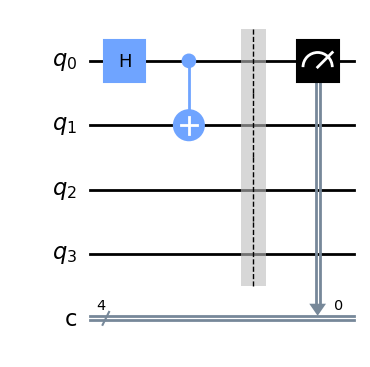


Measurement results:


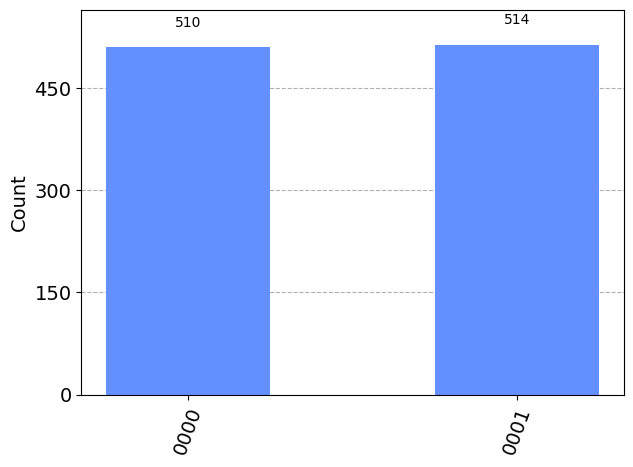

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

# Create quantum circuit
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Add gates
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier()
circuit.measure(qreg_q[0], creg_c[0])

# Draw the circuit (using text output first to verify it works)
print("Quantum Circuit (Text Version):")
print(circuit)

# For graphical output (after verifying text works)
try:
    print("\nQuantum Circuit (Graphical Version):")
    display(circuit.draw(output='mpl'))
except Exception as e:
    print(f"\nCould not display graphical circuit: {e}")

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(circuit)

# Display results
print("\nMeasurement results:")
display(plot_histogram(counts))